<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-01-tree-based-models-decision-tree-cart-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 1.1 CART (Classification and Regression Trees)

CART is a powerful and widely used algorithm for building decision trees. It can be applied to both classification and regression problems, making it a versatile tool in machine learning. The algorithm works by recursively partitioning the data into subsets based on feature values, creating a tree structure that represents the decision-making process.


## Overview

CART (Classification and Regression Trees) is a decision tree algorithm developed by Breiman, Friedman, Olshen, and Stone in 1984. It is a versatile machine learning method used for both `classification` and `regression` tasks. CART builds a binary decision tree by recursively splitting the dataset into two subsets based on feature thresholds, optimizing an impurity or error criterion. It is widely used due to its simplicity, interpretability, and ability to handle mixed data types (numerical and categorical).

### Key Characteristics of CART

-   `Splitting`: Creates **binary splits** (e.g., `X <= t` vs. `X > t`) at each node.
    -   Classification: Predicts a categorical class label (e.g., `Species` in Iris).
    -   Regression: Predicts a continuous value (e.g., `medv` in Boston Housing).
-   `Splitting Criteria`:
    -   Classification: Gini impurity or entropy.
    -   Regression: Variance reduction or Mean Squared Error (MSE).
-   `Pruning`: Uses `cost-complexity pruning` to prevent overfitting by balancing tree complexity and error. -`Output`: A tree where leaf nodes predict the majority class (classification) or mean value (regression).
-   `Implementations`: `rpart` package in R, `sklearn.tree.DecisionTreeClassifier/Regressor` in Python.


### How CART Works

CART builds a decision tree by recursively partitioning the dataset, selecting splits that minimize impurity (classification) or error (regression). Below is a step-by-step explanation, including the mathematical foundation.

1. Initialize the Tree

-   Start with the entire dataset at the root node.

2. Select the Best Split

-   For each feature $X_j$ and possible threshold $t$, evaluate the split into two subsets:

   -   Left: $\{i : X_{ij} \leq t\}$.
   -   Right: $\{i : X_{ij} > t\}$.

-   Compute the impurity or error for each subset and the weighted average:

        
$$ \text{Impurity}_{\text{total}} = \frac{n_L}{n} \text{Impurity}(S_L) + \frac{n_R}{n} \text{Impurity}(S_R), $$


where $n_L$, $n_R$ are the number of observations in the left and right subsets, and $n$ is the total. - Choose the feature and threshold that minimize the total impurity/error.

3.  Splitting Criteri

-   **Classification**:

     
 - `Gini Impurity`: Measures the probability of misclassifying a randomly chosen observation:
  
  $$ G = 1 - \sum_{k=1}^K p_k^2, $$

  where $p_k$ is the proportion of class $k$ in the node.
  

-   `Entropy`(alternative): Measures uncertainty:

$$ H = -\sum_{k=1}^K p_k \log_2(p_k).$$

-   The split minimizes the weighted Gini/entropy of child nodes.

-   **Regression**:

    -   `Variance Reduction`: Measures the reduction in variance after the split:

$$ \text{Var} = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2 $$ 

where $\bar{y}$ is the mean of the response in the node.

-   Alternatively, use MSE directly.
-   The split maximizes the reduction in total variance:

$$ \text{Reduction} = \text{Var}(\text{parent}) - \left( \frac{n_L}{n} \text{Var}(S_L) + \frac{n_R}{n} \text{Var}(S_R) \right) $$

4. Recurse:

-   Apply the best split to create two child nodes.
-   Repeat the splitting process for each child node unless a stopping criterion is met:
    -   Minimum node size (e.g., `minsplit` observations).
    -   Maximum tree depth.
    -   No significant impurity/error reduction (controlled by complexity parameter `cp`).
    -   Node is pure (all observations belong to one class or have the same value).

5. Build the Full Tree

-   Continue splitting until stopping criteria are met, creating a potentially large tree.

6.  Prune the Tree

-   Use `cost-complexity pruning` to simplify the tree and prevent overfitting.
-   `Cost-Complexity Criterion`:

$$ R_\alpha(T) = R(T) + \alpha \cdot |T| $$

where $R(T)$ is the tree’s error (misclassification rate for classification, MSE for regression), $|T|$) is the number of terminal nodes, and $\alpha$ is the complexity parameter (`cp`). - Select the smallest tree whose error is within one standard error of the minimum cross-validated error (via `cptable` in `rpart`).

6. Prediction

-   For a new observation, traverse the tree from the root to a leaf based on the feature values.
-   **Classification**: Return the majority class in the leaf.
-   **Regression**: Return the mean value in the leaf.

Here below the end-to-end flowchart of the CART algorithm:

Here below the end-to-end flowchart of the CART algorithm:


![alt text](http://drive.google.com/uc?export=view&id=1vL4ZEsXmzLhnCmj9WWxb4ZdpPIql6G-q)

### Key Differences Between Classification and Regression

| **Aspect** | **Classification** | **Regression** |
|-------------------|---------------------------|--------------------------|
| **Output** | Discrete class labels | Continuous numerical values |
| **Splitting Criterion** | Gini, Entropy, Misclassification Error | Variance Reduction, MSE |
| **Leaf Node Output** | Majority class | Mean (or median) of target values |
| **Objective** | Maximize class purity | Minimize variance of target values |

### Advantages

-   `Interpretable`: Tree structure is easy to visualize and understand.
-   `Flexible`: Handles numerical, categorical, and missing data.
-   `Non-linear`: Captures complex relationships without assuming linearity.
-   `Feature Importance`: Provides measures based on impurity reduction.

### Disadvantages

-   `Overfitting`: Can create overly complex trees without pruning.
-   `Instability`: Sensitive to small data changes, leading to different trees.
-   `Bias`: Favors features with many split points (e.g., continuous or high-cardinality categorical

## Setup Python Environment

Install required Python packages for data manipulation, machine learning, and visualization.

In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn

## Load Python Packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## CART (Classification and Regression Trees) from Scratch

Implementing CART (Classification and Regression Trees) from scratch in Python without using packages is a complex task requiring manual construction of decision trees. Below, I provide a detailed step-by-step guide to build a basic CART algorithm for both classification (using the Iris dataset) and regression (using the Boston Housing dataset).

The CART algorithm involves recursively splitting the input space into regions based on feature thresholds, using Gini impurity for classification and mean squared error (MSE) for regression to evaluate splits. I’ll implement a simplified version with the following components:

1. `Node structure`: Represent tree nodes.
2. `Splitting criteria`: Gini impurity for classification, MSE for regression.
3. `Tree building`: Recursive partitioning with a stopping criterion.
4. `Prediction`: Class or value prediction for new data.

Due to the complexity, the code will be kept functional but minimal, focusing on core logic. I’ll use the Iris dataset for classification (predicting species) and the Boston Housing dataset for regression (predicting median house value).

### Classification Example



#### Data

We will create a synthetic dataset that mimics the Iris dataset, ensuring that the features are numeric and the target variable is a factor. This will help us avoid issues with factor levels and ensure that the model can be trained effective

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

# Create synthetic Iris-like dataset
n = 150
iris_data = pd.DataFrame({
    'sepal_length': np.random.uniform(4, 8, n),
    'sepal_width': np.random.uniform(2, 4.5, n),
    'petal_length': np.random.uniform(1, 7, n),
    'petal_width': np.random.uniform(0.1, 2.5, n),
    'species': np.random.choice(['setosa', 'versicolor', 'virginica'], n, p=[0.33, 0.33, 0.34])
})

# Display first few rows
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width     species
0      6.785877     2.414845      1.098355     0.324225   virginica
1      5.144557     3.952495      5.327106     2.109919   virginica
2      4.907406     2.716342      1.046425     1.084638   virginica
3      6.205259     2.766174      1.508934     1.688120   virginica
4      6.877876     3.663154      2.352990     2.363681  versicolor


#### Define CART Functions for Classification

`gini_impurity(classes)`
- **Purpose**: Measures node impurity (how mixed classes are).
- **Logic**: Returns 0 if empty. Uses `Counter` to compute class proportions, then applies Gini formula:  $G = 1 - \sum p_k^2$.
- **Example**: For `['setosa', 'setosa', 'versicolor']`, Gini = $1 - \left( (2/3)^2 + (1/3)^2 \right) = 0.444$.
- **Role**: Quantifies node purity for split evaluation.

`gini_split(left_classes, right_classes)`
- **Purpose**: Calculates weighted Gini impurity for a split.
- **Logic**: Computes sizes of left ($n_{\text{left}}$) and right ($n_{\text{right}}$) nodes. Returns weighted average: $\frac{n_{\text{left}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{left}} + \frac{n_{\text{right}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{right}}$.
- **Example**: Left node (pure, Gini=0, size=2), right node (mixed, Gini=0.5, size=2) → $0.5 \cdot 0 + 0.5 \cdot 0.5 = 0.25$.
- **Role**: Evaluates split quality.

`find_best_split(data, target)`
- **Purpose**: Finds the best feature and threshold to minimize Gini impurity.
- **Logic**: Iterates over features and mid-point thresholds. Splits data into left ($X <leq \text{threshold}$) and right ($X > \text{threshold}$) subsets. Computes Gini via `gini_split`. Tracks best split (feature, threshold, indices).
- **Role**: Selects optimal split for a node.

`build_tree(data, target, max_depth=3, min_size=5, depth=0)`
- **Purpose**: Recursively builds the decision tree.
- **Logic**: Stops if node is pure, too small (< `min_size`), or depth ≥ `max_depth`, returning a leaf with the majority class. Otherwise, uses `find_best_split` to split data and builds subtrees.
- **Output**: Dictionary (leaf: `{'is_leaf': True, 'class': label}`; internal node: `{'is_leaf': False, 'feature', 'threshold', 'left', 'right'}`).
- **Role**: Constructs the tree structure.


`predict_tree(tree, row)`
- **Purpose**: Predicts class for a single observation.
- **Logic**: If leaf, returns class. Else, compares `row[feature]` to threshold and recurses left ($\leq$) or right ($>$).
- **Example**: For `petal_length <= 2.5`, follows left branch if `row['petal_length'] = 2.0`.
- **Role**: Makes predictions by traversing the tree.

Overall Workflow
- Builds a binary decision tree by recursively splitting data to minimize Gini impurity.
- Stops based on purity, size, or depth.
- Predicts by navigating splits to a leaf node.
- Used for classification (e.g., Iris dataset), with numerical features and pandas DataFrame input.



In [ ]:
def gini_impurity(classes):
    """Calculate Gini impurity for a list of classes."""
    if len(classes) == 0:
        return 0
    counts = Counter(classes)
    proportions = [count / len(classes) for count in counts.values()]
    return 1 - sum(p ** 2 for p in proportions)

def gini_split(left_classes, right_classes):
    """Calculate weighted Gini impurity for a split."""
    n_left = len(left_classes)
    n_right = len(right_classes)
    n_total = n_left + n_right
    if n_total == 0:
        return 0
    return (n_left / n_total) * gini_impurity(left_classes) + (n_right / n_total) * gini_impurity(right_classes)

def find_best_split(data, target):
    """Find the best feature and threshold to split the data."""
    features = [col for col in data.columns if col != target]
    best_gini = float('inf')
    best_feature = None
    best_threshold = None
    best_split = None

    for feature in features:
        values = sorted(data[feature].unique())
        thresholds = [(values[i] + values[i+1]) / 2 for i in range(len(values)-1)]

        for threshold in thresholds:
            left_idx = data[feature] <= threshold
            right_idx = ~left_idx
            left_classes = data[target][left_idx]
            right_classes = data[target][right_idx]

            if len(left_classes) == 0 or len(right_classes) == 0:
                continue

            gini = gini_split(left_classes, right_classes)
            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = threshold
                best_split = {'left_idx': left_idx, 'right_idx': right_idx}

    return {'feature': best_feature, 'threshold': best_threshold, 'gini': best_gini, 'split': best_split}

def build_tree(data, target, max_depth=3, min_size=5, depth=0):
    """Recursively build the decision tree."""
    classes = data[target]

    # Stopping criteria
    if len(classes.unique()) == 1 or len(data) < min_size or depth >= max_depth:
        return {'is_leaf': True, 'class': Counter(classes).most_common(1)[0][0]}

    # Find best split
    split_info = find_best_split(data, target)
    if split_info['feature'] is None:
        return {'is_leaf': True, 'class': Counter(classes).most_common(1)[0][0]}

    # Split data
    left_data = data[split_info['split']['left_idx']]
    right_data = data[split_info['split']['right_idx']]

    # Build subtrees
    left_subtree = build_tree(left_data, target, max_depth, min_size, depth + 1)
    right_subtree = build_tree(right_data, target, max_depth, min_size, depth + 1)

    return {
        'is_leaf': False,
        'feature': split_info['feature'],
        'threshold': split_info['threshold'],
        'left': left_subtree,
        'right': right_subtree
    }

def predict_tree(tree, row):
    """Predict class for a single observation."""
    if tree['is_leaf']:
        return tree['class']
    if row[tree['feature']] <= tree['threshold']:
        return predict_tree(tree['left'], row)
    else:
        return predict_tree(tree['right'], row)

#### Fit the Classification Model

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
train_data, test_data = train_test_split(iris_data, test_size=0.2, random_state=123)

# Build tree
tree = build_tree(train_data, 'species', max_depth=3, min_size=5)

#### Prediction and Evaluation

In [ ]:
# Predict on test data
predictions = test_data.apply(lambda row: predict_tree(tree, row), axis=1)

# Evaluate accuracy
accuracy = (predictions == test_data['species']).mean()
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.4


#### Evaluation Metrics for Binary Classification

For demonstration, we convert the Iris dataset to a binary classification problem (setosa vs. non-setosa) and compute evaluation metrics.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Convert Iris to binary classification
binary_iris = iris_data.copy()
binary_iris['species'] = (binary_iris['species'] == 'setosa').astype(int)
X_bin = binary_iris.drop('species', axis=1)
y_bin = binary_iris['species']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=123)

# Fit binary classification tree
clf_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5, ccp_alpha=0.01, random_state=123)
clf_tree.fit(X_train_bin, y_train_bin)
predictions_bin = clf_tree.predict(X_test_bin)

# Confusion matrix
cm = confusion_matrix(y_test_bin, predictions_bin)

# Calculate metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / cm.sum()
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.6333333333333333
Precision: 0.0
Recall: 0.0
Specificity: 0.8636363636363636
F1 Score: 0


### Regression Eaxample

Regression trees are used to predict continuous values. The process is similar to classification, but we use mean squared error (MSE) as the splitting criterion. 


#### Data

We will create a synthetic dataset that mimics the Boston Housing dataset, ensuring that the `rooms` feature is numeric and `medv` is calculated after the data frame is created. This will help us avoid issues with factor levels and ensure that the model can be trained effectively.

In [ ]:
# Create synthetic Boston Housing-like dataset
n = 506
boston_data = pd.DataFrame({
    'crim': np.random.uniform(0, 90, n),
    'zn': np.random.choice([0, 18, 25, 35], n, p=[0.7, 0.1, 0.1, 0.1]),
    'indus': np.random.uniform(0, 27, n),
    'chas': np.random.choice([0, 1], n, p=[0.95, 0.05]),
    'nox': np.random.uniform(0.4, 0.9, n),
    'rm': np.random.uniform(5, 9, n),
    'age': np.random.uniform(0, 100, n),
    'dis': np.random.uniform(1, 12, n),
    'rad': np.random.choice(range(1, 25), n),
    'tax': np.random.uniform(200, 700, n),
    'ptratio': np.random.uniform(12, 22, n),
    'b': np.random.uniform(0, 400, n),
    'lstat': np.random.uniform(5, 30, n)
})

# Add synthetic target variable (medv)
boston_data['medv'] = (
    50 - 0.5 * boston_data['crim'] + 0.1 * boston_data['zn'] - 0.2 * boston_data['indus'] +
    3 * boston_data['chas'] + 5 * boston_data['rm'] - 0.1 * boston_data['age'] -
    1.5 * boston_data['dis'] + 0.02 * boston_data['rad'] - 0.01 * boston_data['tax'] -
    0.3 * boston_data['ptratio'] + 0.05 * boston_data['b'] - 0.7 * boston_data['lstat'] +
    np.random.normal(0, 3, n)
)
# Display first few rows
print(boston_data.head())

#### Define CART Functions for Regression

Python code for a CART regression tree using MSE to split data and predict continuous values.

 `mse_node(values)`
- **Purpose**: Compute MSE for node’s target values.
- **Logic**: Return 0 if empty/missing. Else, MSE = $\frac{1}{n} \sum (y_i - \bar{y})^2$.
- **Role**: Measures node variance.



`mse_split(left_values, right_values)`
- **Purpose**: Weighted MSE for a split.
- **Logic**: $\frac{n_{\text{left}}}{n_{\text{total}}} \cdot \text{MSE}_{\text{left}} + \frac{n_{\text{right}}}{n_{\text{total}}} \cdot \text{MSE}_{\text{right}}$.
- **Role**: Evaluates split quality.


 `find_best_split_reg(data, target)`
- **Purpose**: Find best feature/threshold to minimize MSE.
- **Logic**: Test numeric features’ mid-point thresholds, keep split with lowest MSE.
- **Role**: Selects optimal split.

 `build_tree_reg(data, target, max_depth=3, min_size=5, depth=0)`
- **Purpose**: Build tree recursively.
- **Logic**: Stop if small, deep, or all missing; return leaf (mean or 0). Else, split and recurse.
- **Role**: Constructs tree.

 `predict_tree_reg(tree, row)`
- **Purpose**: Predict value for a row.
- **Logic**: Return leaf’s value (0 if missing). Else, recurse left (if ≤ threshold/missing) or right.
- **Role**: Makes predictions.

 Workflow
- Splits data to minimize MSE, stops at limits/missing data.
- Predicts via tree traversal to leaf’s mean.
- Uses pandas DataFrame, numeric features.

In [ ]:
import numpy as np
import pandas as pd

def mse_node(values):
    """Calculate mean squared error for a node."""
    if len(values) == 0:
        return 0
    values = values.dropna()
    if len(values) == 0:
        return 0
    return np.mean((values - np.mean(values))**2)

def mse_split(left_values, right_values):
    """Calculate weighted MSE for a split."""
    n_left = len(left_values)
    n_right = len(right_values)
    n_total = n_left + n_right
    if n_total == 0:
        return 0
    return (n_left / n_total) * mse_node(left_values) + (n_right / n_total) * mse_node(right_values)

def find_best_split_reg(data, target):
    """Find the best feature and threshold to split the data for regression."""
    features = [col for col in data.columns if col != target and np.issubdtype(data[col].dtype, np.number)]
    best_mse = float('inf')
    best_feature = None
    best_threshold = None
    best_split = None

    for feature in features:
        values = sorted(data[feature].dropna().unique())
        if len(values) < 2:
            continue
        thresholds = [(values[i] + values[i+1]) / 2 for i in range(len(values)-1)]

        for threshold in thresholds:
            left_idx = (data[feature] <= threshold) & data[feature].notna()
            right_idx = (data[feature] > threshold) & data[feature].notna()
            left_values = data[target][left_idx]
            right_values = data[target][right_idx]

            if len(left_values) == 0 or len(right_values) == 0:
                continue

            mse = mse_split(left_values, right_values)
            if mse < best_mse:
                best_mse = mse
                best_feature = feature
                best_threshold = threshold
                best_split = {'left_idx': left_idx, 'right_idx': right_idx}

    return {'feature': best_feature, 'threshold': best_threshold, 'mse': best_mse, 'split': best_split}

def build_tree_reg(data, target, max_depth=3, min_size=5, depth=0):
    """Recursively build the regression tree."""
    values = data[target]

    if len(data) < min_size or depth >= max_depth or values.isna().all():
        return {'is_leaf': True, 'value': 0 if values.isna().all() else np.mean(values.dropna())}

    split_info = find_best_split_reg(data, target)
    if split_info['feature'] is None:
        return {'is_leaf': True, 'value': 0 if values.isna().all() else np.mean(values.dropna())}

    left_data = data[split_info['split']['left_idx']]
    right_data = data[split_info['split']['right_idx']]

    left_subtree = build_tree_reg(left_data, target, max_depth, min_size, depth + 1)
    right_subtree = build_tree_reg(right_data, target, max_depth, min_size, depth + 1)

    return {
        'is_leaf': False,
        'feature': split_info['feature'],
        'threshold': split_info['threshold'],
        'left': left_subtree,
        'right': right_subtree
    }

def predict_tree_reg(tree, row):
    """Predict value for a single observation."""
    if tree['is_leaf']:
        return 0 if np.isnan(tree['value']) else tree['value']
    if pd.isna(row[tree['feature']]) or row[tree['feature']] <= tree['threshold']:
        return predict_tree_reg(tree['left'], row)
    else:
        return predict_tree_reg(tree['right'], row)

#### Prediction and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
# Split Boston data into training and testing sets
train_boston, test_boston = train_test_split(boston_data, test_size=0.2, random_state=123)

# Build regression tree
reg_tree = build_tree_reg(train_boston, 'medv', max_depth=3, min_size=5)

# Predict on test data
predictions_reg = test_boston.apply(lambda row: predict_tree_reg(reg_tree, row), axis=1)

# Check for NA in predictions
if predictions_reg.isna().any():
  print("Warning: NA values in predictions\n")

# Evaluate RMSE
errors_reg = predictions_reg - test_boston['medv']
squared_errors_reg = errors_reg**2
mean_squared_error_reg = np.mean(squared_errors_reg.dropna())
rmse_reg = np.sqrt(mean_squared_error_reg)
print(f"Regression RMSE: {rmse_reg}\n")

Regression RMSE: 11.28667305019933



## CART (Classification and Regression Trees) in Python

Decision Trees are versatile machine learning algorithms that can handle both regression and classification tasks. This tutorial will guide you step-by-step through the implementation of Decision Trees in Python for classification and regression. We use the {scikit-learn} package (equivalent to R’s {rpart}) package, which is widely used for building decision trees in Python.The code includes data preparation, model training, pruning, visualization, prediction, evaluation metrics, and variable importance plotting, using appropriate Python libraries (`{numpy}`, `{pandas}`, `{scikit-learn}`, `{matplotlib}`, `{seaborn}`, and `{sklearn.tree.plot_tree}`).

### Load Required Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

### Classification Example

#### Load and prepare Iris data

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

# Load and prepare Iris data
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Split data into training (70%) and testing (30%) sets
train_idx = np.random.choice(data.index, size=int(0.7 * len(data)), replace=False)
train_data = data.loc[train_idx]
test_data = data.loc[~data.index.isin(train_idx)]

#### Build the Initial Tree

We will use `DecisionTreeClassifier` with `min_samples_split=5` and `ccp_alpha=0.01` (equivalent to R’s cp=0.01) and fits on training features and target

In [ ]:
# Build initial tree
cart_model = DecisionTreeClassifier(min_samples_split=5, ccp_alpha=0.01, random_state=123)
cart_model.fit(train_data.drop('Species', axis=1), train_data['Species'])

DecisionTreeClassifier(ccp_alpha=0.01, min_samples_split=5, random_state=123)

We use use `cost_complexity_pruning_path` to get `ccp_alphas` and `impurities`, plot them using {matplotlib}

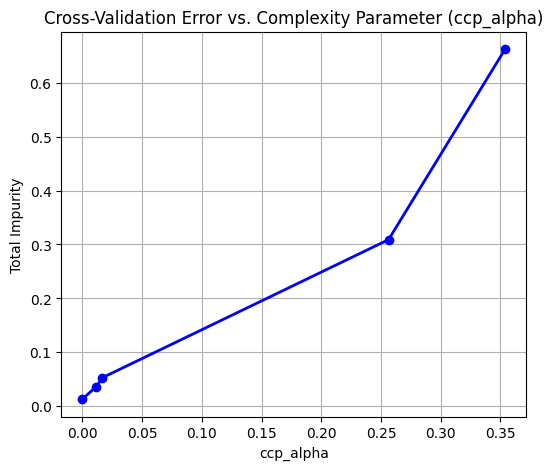

In [ ]:
# Cross-validation error vs. complexity parameter (ccp_alpha)
path = cart_model.cost_complexity_pruning_path(train_data.drop('Species', axis=1), train_data['Species'])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(6, 5))
plt.plot(ccp_alphas, impurities, marker='o', color='blue', linewidth=2)
plt.title("Cross-Validation Error vs. Complexity Parameter (ccp_alpha)")
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity")
plt.grid(True)
plt.show()


#### Pruning the tree

Selects `ccp_alpha` with lowest impurity (analogous to R’s xerror minimization). Refits model with optimal ccp_alpha.

In [ ]:
# Find optimal ccp_alpha and prune tree
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]
pruned_model = DecisionTreeClassifier(min_samples_split=5, ccp_alpha=optimal_ccp_alpha, random_state=123)
pruned_model.fit(train_data.drop('Species', axis=1), train_data['Species'])
print(f"Optimal ccp_alpha for Pruning: {optimal_ccp_alpha}")

Optimal ccp_alpha for Pruning: 0.0


#### Tree Visualization
Uses `plot_tree` to visualize the pruned tree, with class probabilities and  counts (extra=104 equivalent via proportion=True).

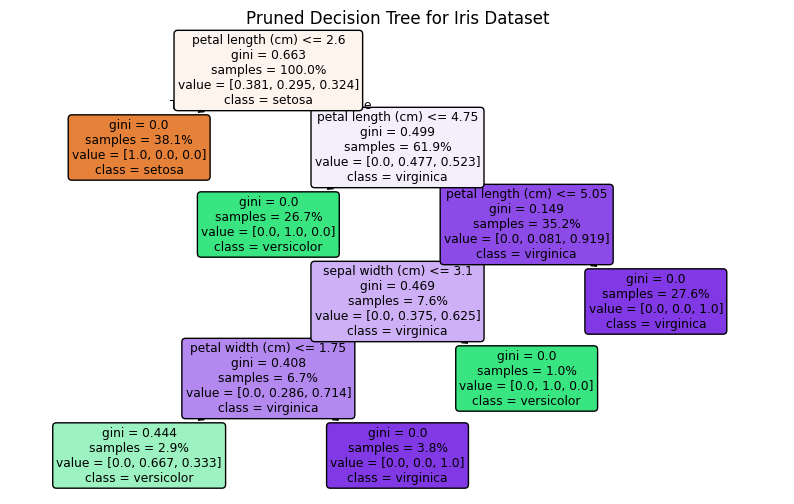

In [ ]:
# Visualize the pruned tree
plt.figure(figsize=(10, 6))
plot_tree(pruned_model, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, proportion=True, rounded=True)
plt.title("Pruned Decision Tree for Iris Dataset")
plt.show()

#### Prediction and Evaluation

- Predicts using predict with type="class".
- Computes accuracy as the mean of correct predictions.
- Generates confusion matrix with confusion_matrix.
- Calculates metrics (accuracy, precision, recall, specificity, F1 score)
 assuming versicolor as the positive class for simplicity (multi-class metrics would require adjustment).

In [ ]:
# Predict on test data
predictions = pruned_model.predict(test_data.drop('Species', axis=1))

# Evaluate accuracy
accuracy = (predictions == test_data['Species']).mean()
print(f"Classification Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(test_data['Species'], predictions, labels=iris.target_names)
print("Confusion Matrix:")
print(cm)

# Evaluation metrics (assuming binary classification for simplicity, e.g., versicolor vs. others)
# Adjust indices for multi-class or specific class (e.g., versicolor as positive)
TP = cm[1, 1]  # versicolor as positive class
TN = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]
FP = cm[0, 1] + cm[2, 1]
FN = cm[1, 0] + cm[1, 2]

accuracy = (TP + TN) / cm.sum()
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1_score}")

Classification Accuracy: 0.9555555555555556
Confusion Matrix:
[[10  0  0]
 [ 0 18  1]
 [ 0  1 15]]
Accuracy: 0.9555555555555556
Precision: 0.9473684210526315
Recall: 0.9473684210526315
Specificity: 0.9615384615384616
F1 Score: 0.9473684210526315


#### Variable Importance
- Uses `feature_importances_` from DecisionTreeClassifier, replacing variable.importance.
- Plots with seaborn.barplot, mimicking R’s barplot.

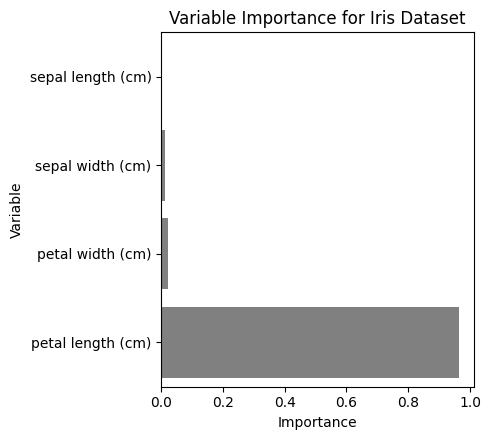

In [ ]:
# Variable importance plot
var_imp = pd.Series(pruned_model.feature_importances_, index=iris.feature_names)
var_imp = var_imp.sort_values()

plt.figure(figsize=(5, 4.5))
sns.barplot(x=var_imp.values, y=var_imp.index, color='grey')
plt.title("Variable Importance for Iris Dataset")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


### Regression Example

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

#### Data  and Data Preparation

We will use the `Boston` dataset from the fetch_openml} package. The dataset contains various features related to housing in Boston and their corresponding median house values. The goal is to predict the median house value based on the features.

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

# Load Boston Housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.data
data['medv'] = boston.target

# Split data into training (70%) and testing (30%) sets
train_idx = np.random.choice(data.index, size=int(0.7 * len(data)), replace=False)
train_data = data.loc[train_idx]
test_data = data.loc[~data.index.isin(train_idx)]

#### Build initial tree

In [ ]:
# Build initial tree
cart_model = DecisionTreeRegressor(min_samples_split=5, ccp_alpha=0.01, random_state=123)
cart_model.fit(train_data.drop('medv', axis=1), train_data['medv'])

DecisionTreeRegressor(ccp_alpha=0.01, min_samples_split=5, random_state=123)

#### Cross-validation error vs. complexity parameter (ccp_alpha)

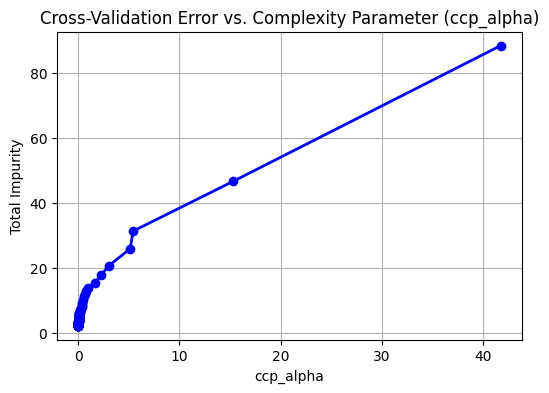

In [ ]:
# Cross-validation error vs. complexity parameter (ccp_alpha)
path = cart_model.cost_complexity_pruning_path(train_data.drop('medv', axis=1), train_data['medv'])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, impurities, marker='o', color='blue', linewidth=2)
plt.title("Cross-Validation Error vs. Complexity Parameter (ccp_alpha)")
plt.xlabel("ccp_alpha")
plt.ylabel("Total Impurity")
plt.grid(True)
plt.show()

#### Prune Tree

In [ ]:
# Find optimal ccp_alpha and prune tree
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]
pruned_model = DecisionTreeRegressor(min_samples_split=5, ccp_alpha=optimal_ccp_alpha, random_state=123)
pruned_model.fit(train_data.drop('medv', axis=1), train_data['medv'])
print(f"Optimal ccp_alpha for Pruning: {optimal_ccp_alpha}")

Optimal ccp_alpha for Pruning: 0.0


####  Visualize the pruned tree

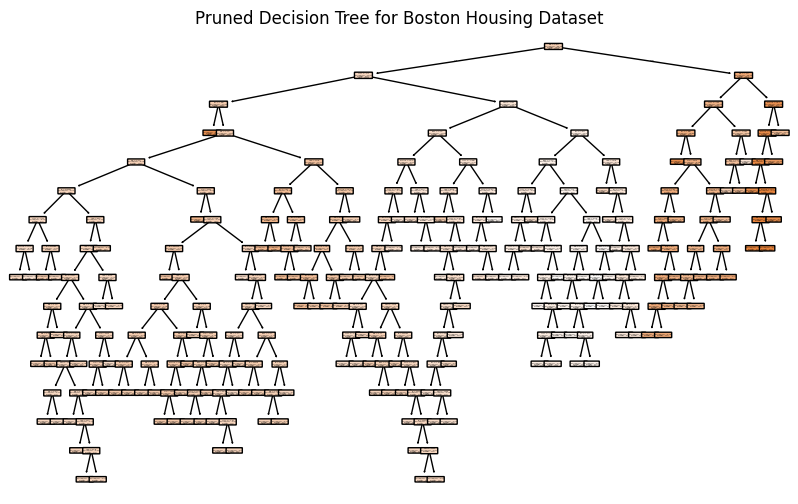

In [ ]:
# Visualize the pruned tree
plt.figure(figsize=(10, 6))
plot_tree(pruned_model, feature_names=boston.feature_names, filled=True, proportion=True, rounded=True)
plt.title("Pruned Decision Tree for Boston Housing Dataset")
plt.show()

#### Prediction and Evaluation

In [ ]:
# Predict on test data
predictions = pruned_model.predict(test_data.drop('medv', axis=1))

# Evaluate MSE
mse = mean_squared_error(test_data['medv'], predictions)
print(f"Regression MSE: {mse}")


Regression MSE: 15.685352704678364


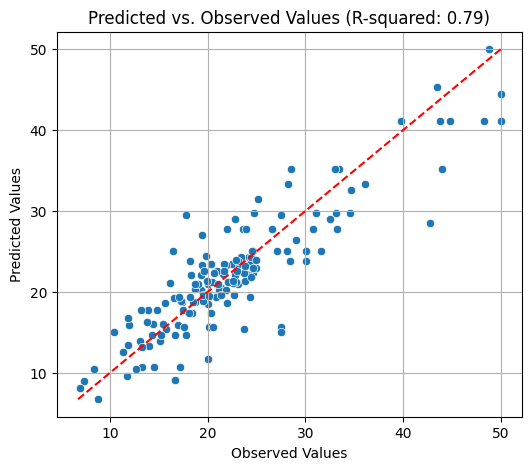

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(test_data['medv'], predictions)

# Create scatter plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=test_data['medv'], y=predictions)
plt.title(f'Predicted vs. Observed Values (R-squared: {r2:.2f})')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a 1:1 line for reference
max_val = max(test_data['medv'].max(), predictions.max())
min_val = min(test_data['medv'].min(), predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

#### Variable Importance

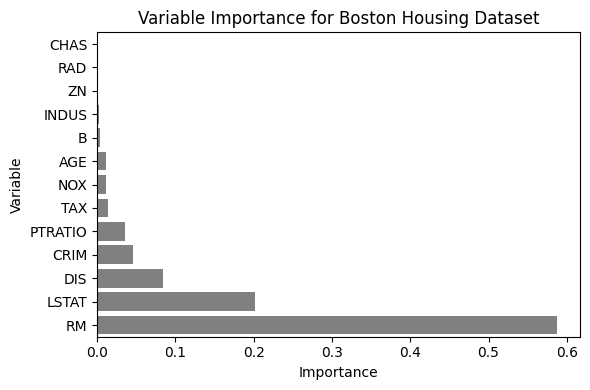

In [ ]:
# Variable importance plot
var_imp = pd.Series(pruned_model.feature_importances_, index=boston.feature_names)
var_imp = var_imp.sort_values()

plt.figure(figsize=(6, 4))
sns.barplot(x=var_imp.values, y=var_imp.index, color='grey')
plt.title("Variable Importance for Boston Housing Dataset")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

## Summary and Conclusion

This notebook provided a comprehensive overview and practical implementation of the CART (Classification and Regression Trees) algorithm. We explored the fundamental concepts, key characteristics, and the step-by-step process of how CART works, including the mathematical foundations for splitting criteria like Gini impurity and MSE.

We then delved into implementing a basic CART algorithm from scratch in Python for both classification (using a synthetic Iris-like dataset) and regression (using a synthetic Boston Housing-like dataset). This hands-on approach helped illustrate the core mechanics of tree building and prediction.

Finally, we demonstrated how to utilize the `scikit-learn` library for building and evaluating CART models in Python. Using the real Iris and Boston Housing datasets, we covered data preparation, initial tree building, cost-complexity pruning, tree visualization, prediction, evaluation metrics (accuracy, confusion matrix, precision, recall, F1 score for classification; MSE and R-squared for regression), and variable importance plotting.

In conclusion, CART is a powerful and interpretable algorithm for both classification and regression tasks. While a from-scratch implementation aids in understanding the underlying principles, libraries like `scikit-learn` provide efficient and robust tools for practical application, including essential techniques like pruning to prevent overfitting. The examples presented highlight the versatility of CART and the importance of evaluating model performance using appropriate metrics and visualizations.

## Further Learning and Resources

Here are some resources for learning about Classification and Regression Trees (CART) with Python:

1. **Scikit-learn Documentation**  
   - **Link**: [Scikit-learn Decision Trees](https://scikit-learn.org/stable/modules/tree.html)  
   - Official documentation for implementing CART using `DecisionTreeClassifier` and `DecisionTreeRegressor` in scikit-learn. Includes examples for classification and regression tasks.

2. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow** by Aurélien Géron  
   - Book with a dedicated section on decision trees, including CART implementation in Python using scikit-learn. Practical examples and visualizations.  
   - Available on: O’Reilly, Amazon, or other book retailers.

3. **Real Python Tutorial: Decision Trees in Python**  
   - **Link**: [Decision Trees in Python with Scikit-Learn](https://realpython.com/decision-tree-python/)  
   - A beginner-friendly tutorial covering CART basics, implementation, and visualization using scikit-learn.

4. **Towards Data Science: Understanding Decision Trees with Python**  
   - **Link**: Search for “Decision Trees in Python” on [Towards Data Science](https://towardsdatascience.com)  
   - Articles explaining CART concepts, hyperparameter tuning, and Python code examples using scikit-learn.

5. **Kaggle: Decision Tree Tutorial**  
   - **Link**: [Kaggle Decision Tree Notebooks](https://www.kaggle.com)  
   - Search for “decision tree Python” on Kaggle for hands-on notebooks with CART implementations, datasets, and visualizations.

6. **YouTube: Decision Trees in Python**  
   - Channels like StatQuest or freeCodeCamp have videos on CART with Python examples.  
   - Search for “StatQuest Decision Trees Python” or “Decision Trees Python freeCodeCamp” on YouTube.

7. **DataCamp: Decision Tree Classification in Python**  
   - **Link**: [DataCamp Decision Trees](https://www.datacamp.com)  
   - Interactive course with Python exercises for building and evaluating CART models.




